# 机器学习算法（五）：基于决策树的分类预测

## 1 逻决策树的介绍和应用

## 1.1 决策树的介绍

决策树是一种常见的分类模型，在金融风控、医疗辅助诊断等诸多行业具有较为广泛的应用。决策树的核心思想是基于树结构对数据进行划分，这种思想是人类处理问题时的本能方法。例如在婚恋市场中，女方通常会先询问男方是否有房产，如果有房产再了解是否有车产，如果有车产再看是否有稳定工作……最后得出是否要深入了解的判断。

决策树的主要优点：

1. 具有很好的解释性，模型可以生成可以理解的规则。
2. 可以发现特征的重要程度。
3. 模型的计算复杂度较低。

决策树的主要缺点：

1. 模型容易过拟合，需要采用减枝技术处理。
2. 不能很好利用连续型特征。
3. 预测能力有限，无法达到其他强监督模型效果。
4. 方差较高，数据分布的轻微改变很容易造成树结构完全不同。

## 1.2 决策树的应用

由于决策树模型中自变量与因变量的非线性关系以及决策树简单的计算方法，使得它成为集成学习中最为广泛使用的基模型。梯度提升树(GBDT)，XGBoost以及LightGBM等先进的集成模型都采用了决策树作为基模型，在广告计算、CTR预估、金融风控等领域大放异彩，成为当今与神经网络相提并论的复杂模型，更是数据挖掘比赛中的常客。在新的研究中，南京大学周志华教授提出一种多粒度级联森林模型，创造了一种全新的基于决策树的深度集成方法，为我们提供了决策树发展的另一种可能。

同时决策树在一些明确需要可解释性或者提取分类规则的场景中被广泛应用，而其他机器学习模型在这一点很难做到。例如在医疗辅助系统中，为了方便专业人员发现错误，常常将决策树算法用于辅助病症检测。例如在一个预测哮喘患者的模型中，医生发现测试的许多高级模型的效果非常差。在他们运行了一个决策树模型后发现，算法认为剧烈咳嗽的病人患哮喘的风险很小。但医生非常清楚剧烈咳嗽一般都会被立刻检查治疗，这意味着患有剧烈咳嗽的哮喘病人都会马上得到收治。用于建模的数据认为这类病人风险很小，是因为所有这类病人都得到了及时治疗，所以极少有人在此之后患病或死亡。

# 2. 实验室手册

## 2.1 学习目标

- 了解 决策树 的理论知识
- 掌握 决策树 的 sklearn 函数调用并将其运用在企鹅数据集的预测中

## 2.2 代码流程

Part1 Demo实践

- Step1:库函数导入
- Step2:模型训练 
- Step3:数据和模型可视化 
- Step4:模型预测

Part2 基于企鹅（penguins）数据集的决策树分类实践

- Step1:库函数导入 
- Step2:数据读取/载入 
- Step3:数据信息简单查看 
- Step4:可视化描述 
- Step5:利用 决策树模型 在二分类上 进行训练和预测 
- Step6:利用 决策树模型 在三分类(多分类)上 进行训练和预测

## 2.3 算法实战

## 2.3.1 Demo实践

Step1: 库函数导入

In [1]:
# 基础函数库
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 决策树模型函数
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Step2: 训练模型

In [2]:
# Demo演示LogisticRegression分类
# 构造数据集
x_features = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 1, 0, 1, 0, 1])

# 调用决策树回归模型
tree_clf = DecisionTreeClassifier()

# 调用决策树模型拟合构造的数据集
tree_clf = tree_clf.fit(x_features, y_label)

Step3: 数据和模型可视化（需要用到graphviz可视化库）

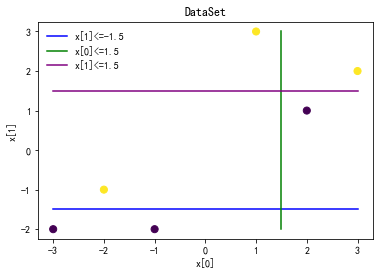

In [3]:
plt.figure()
plt.scatter(x_features[:, 0], x_features[:, 1], c=y_label, s=50, cmap='viridis')

plt.title('DataSet')
plt.ylabel('x[1]')
plt.xlabel('x[0]')

# 画决策线
x, y = np.meshgrid(range(-3, 4), -1.5)
plt.plot(x.reshape(-1), y.reshape(-1), c='b', label='x[1]<=-1.5')
x, y = np.meshgrid(1.5, range(-2, 4))
plt.plot(x.reshape(-1), y.reshape(-1), c='g', label='x[0]<=1.5')
x, y = np.meshgrid(range(-3, 4), 1.5)
plt.plot(x.reshape(-1), y.reshape(-1), c='purple', label='x[1]<=1.5')

plt.legend(loc='upper left', frameon=False)
plt.show()

In [4]:
# 可视化决策树
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('pengunis')

'pengunis.pdf'

<img src="pic/决策树.png" style="zoom:70%">

Step4:模型预测

In [5]:
# 创建新样本
x_features_new1 = np.array([[0, -1]])
x_features_new2 = np.array([[2, 1]])

# 在训练集和测试集上分别利用训练好的模型进行预测
y_label_new1_predict = tree_clf.predict(x_features_new1)
y_label_new2_predict = tree_clf.predict(x_features_new2)

print('The new point 1 predict class:\n', y_label_new1_predict)
print('The new point 2 predict class:\n', y_label_new2_predict)

The new point 1 predict class:
 [1]
The new point 2 predict class:
 [0]


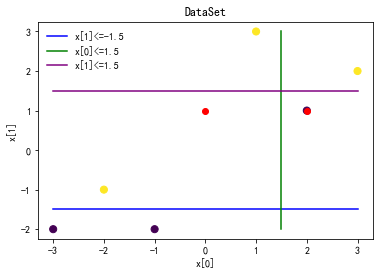

In [6]:
plt.figure()
plt.scatter(x_features[:, 0], x_features[:, 1], c=y_label, s=50, cmap='viridis')
# 新样本
plt.scatter(x_features_new1[0][0], x_features_new2[0][1], c='red')
plt.scatter(x_features_new2[0][0], x_features_new2[0][1], c='red')
plt.title('DataSet')
plt.ylabel('x[1]')
plt.xlabel('x[0]')

# 画决策线
x, y = np.meshgrid(range(-3, 4), -1.5)
plt.plot(x.reshape(-1), y.reshape(-1), c='b', label='x[1]<=-1.5')
x, y = np.meshgrid(1.5, range(-2, 4))
plt.plot(x.reshape(-1), y.reshape(-1), c='g', label='x[0]<=1.5')
x, y = np.meshgrid(range(-3, 4), 1.5)
plt.plot(x.reshape(-1), y.reshape(-1), c='purple', label='x[1]<=1.5')

plt.legend(loc='upper left', frameon=False)
plt.show()

## 2.3.2 基于企鹅数据集的决策树实战

在实践的最开始，我们首先需要导入一些基础的函数库包括：numpy （Python进行科学计算的基础软件包），pandas（pandas是一种快速，强大，灵活且易于使用的开源数据分析和处理工具），matplotlib和seaborn绘图。

In [7]:
# 下载需要用到的数据集
import os
import urllib.request
# url = 'https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/6tree/penguins_raw.csv'
# filename = os.getcwd() + '\\data\\' + url.split('/')[-1]
# urllib.request.urlretrieve(url, filename=filename)

**Step1：函数库导入**

In [8]:
import pandas as pd
import seaborn as sns

本次我们选择企鹅数据（palmerpenguins）进行方法的尝试训练，该数据集一共包含8个变量，其中7个特征变量，1个目标分类变量。共有150个样本，目标变量为 企鹅的类别 其都属于企鹅类的三个亚属，分别是(Adélie, Chinstrap and Gentoo)。包含的三种种企鹅的七个特征，分别是所在岛屿，嘴巴长度，嘴巴深度，脚蹼长度，身体体积，性别以及年龄。

| 变量              | 描述                                                       |
|-------------------|------------------------------------------------------------|
| species           | a factor denoting penguin species                          |
| island            | a factor denoting island in Palmer Archipelago, Antarctica |
| bill_length_mm    | a number denoting bill length                              |
| bill_depth_mm     | a number denoting bill depth                               |
| flipper_length_mm | an integer denoting flipper length                         |
| body_mass_g       | an integer denoting body mass                              |
| sex               | a factor denoting penguin sex                              |
| year              | an integer denoting the study year                         |

**Step2：数据读取/载入**

In [9]:
data = pd.read_csv('data\penguins_raw.csv')
## 为了方便我们仅选取四个简单的特征，有兴趣的同学可以研究下其他特征的含义以及使用方法
data = data[['Species','Culmen Length (mm)','Culmen Depth (mm)',
            'Flipper Length (mm)','Body Mass (g)']]

**Step3：数据信息简单查看**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Culmen Length (mm)   342 non-null    float64
 2   Culmen Depth (mm)    342 non-null    float64
 3   Flipper Length (mm)  342 non-null    float64
 4   Body Mass (g)        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [11]:
data.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0


这里我们发现数据集中存在NaN，一般的我们认为NaN在数据集中代表了缺失值，可能是数据采集或处理时产生的一种错误。这里我们采用-1将缺失值进行填补，还有其他例如“中位数填补、平均数填补”的缺失值处理方法有兴趣的同学也可以尝试。

In [12]:
data = data.fillna(data.mean())
data.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),39.10000,18.70000,181.000000,3750.000000
1,Adelie Penguin (Pygoscelis adeliae),39.50000,17.40000,186.000000,3800.000000
2,Adelie Penguin (Pygoscelis adeliae),40.30000,18.00000,195.000000,3250.000000
3,Adelie Penguin (Pygoscelis adeliae),43.92193,17.15117,200.915205,4201.754386
4,Adelie Penguin (Pygoscelis adeliae),36.70000,19.30000,193.000000,3450.000000


In [13]:
# 查看类别
data.Species.unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)'], dtype=object)

In [14]:
# 特征的一些描述 
data.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Step4:可视化描述**

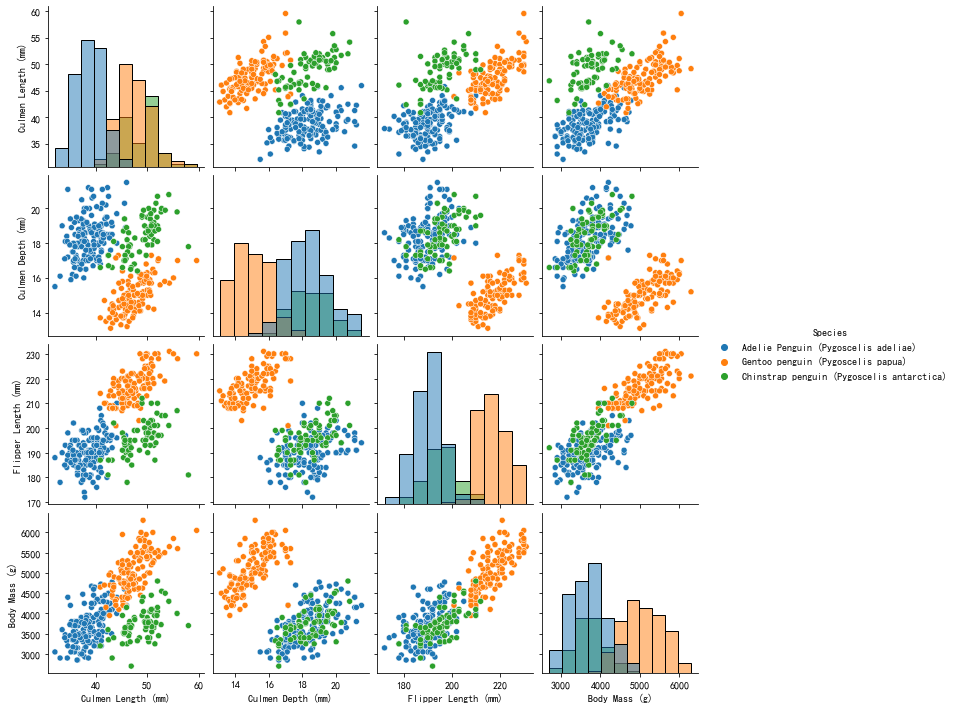

In [15]:
# 特征与标签组合的散点可视化
sns.pairplot(data=data, diag_kind='hist', hue='Species')
plt.show()

从上图可以发现，在2D情况下不同的特征组合对于不同类别的企鹅的散点分布，以及大概的区分能力。Culmen Lenth与其他特征的组合散点的重合较少，所以对于数据集的划分能力最好。

我们发现

In [16]:
'''为了方便我们将标签转化为数字
       'Adelie Penguin (Pygoscelis adeliae)'        ------0
       'Gentoo penguin (Pygoscelis papua)'          ------1
       'Chinstrap penguin (Pygoscelis antarctica)   ------2 
'''
label = data.Species.unique()
def trans(x):
    if x == label[0]:
        return 0
    if x == label[1]:
        return 1
    if x == label[2]:
        return 2

data['Species'] = data.agg({'Species':trans})
data.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,0,39.10000,18.70000,181.000000,3750.000000
1,0,39.50000,17.40000,186.000000,3800.000000
2,0,40.30000,18.00000,195.000000,3250.000000
3,0,43.92193,17.15117,200.915205,4201.754386
4,0,36.70000,19.30000,193.000000,3450.000000


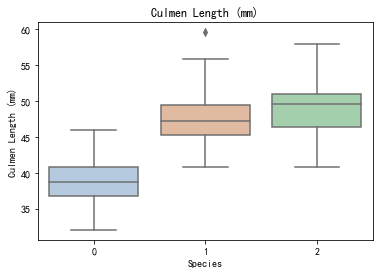

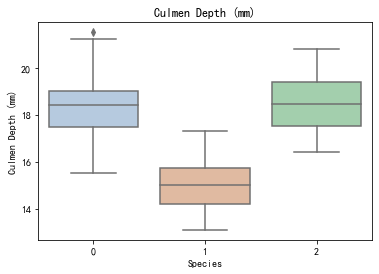

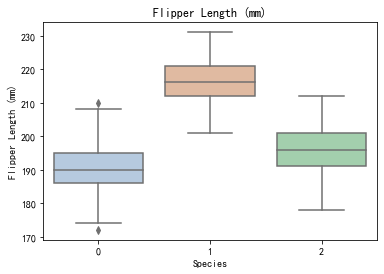

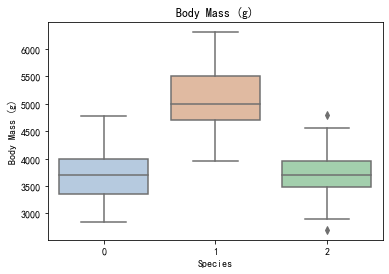

In [17]:
for col in data.columns[1:]:
    sns.boxplot(x='Species', y=col, saturation=0.5, palette='pastel', data=data)
    plt.title(col)
    plt.show()

利用箱型图我们也可以得到不同类别在不同特征上的分布差异情况。

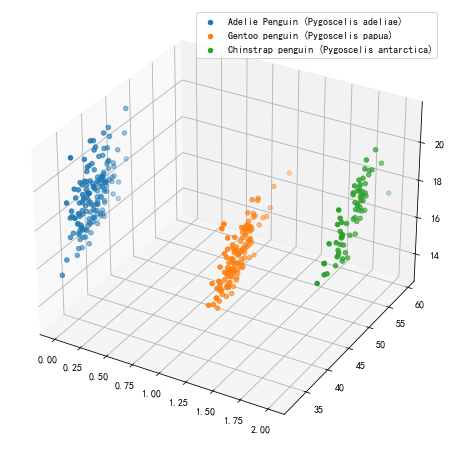

In [18]:
# 选取其前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
for k in range(3):
    data_class = data[data.Species==k].values
    ax.scatter(data_class[:, 0], data_class[:, 1], data_class[:, 2], label=label[k])

plt.legend()
plt.show()
    

**Step5:利用 决策树模型 在二分类上 进行训练和预测**

In [19]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

# 选择其类别为0和1的样本（不包括类别为2的样本）
data_target_part = data[data.Species.isin([0, 1])][['Species']]
data_features_part = data[data.Species.isin([0, 1])][data.columns[1:]]

# 测试集大小为20%
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part,
                                                    test_size=0.2, random_state=2020)

In [24]:
# 从sklearn中导入决策树模型
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# 定义 决策树模型
clf = DecisionTreeClassifier(criterion='entropy')
# 在训练集上训练决策树模型
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
## 可视化
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('penguins')

'penguins.pdf'

<img src ='pic//企鹅.png' style='zoom:70%'>

The accuracy of the DecisionTreeClassifier is: 0.9954545454545455
The accuracy of the DecisionTreeClassifier is: 1.0
The confusion matrix result:
 [[31  0]
 [ 0 25]]


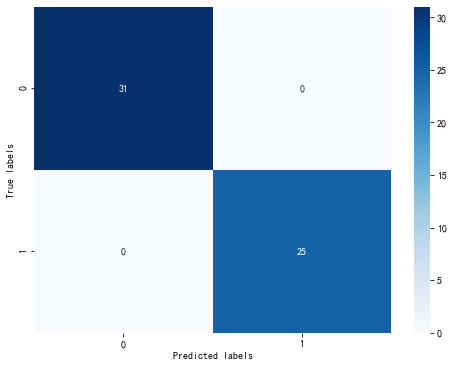

In [42]:
# 在训练集和测试集上分别利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics

# 利用accuracy(准确度)[预测正确的样本数目占总预测样本数目的比例]评估模型效果
print('The accuracy of the DecisionTreeClassifier is:', metrics.accuracy_score(y_train, train_predict))
print('The accuracy of the DecisionTreeClassifier is:', sum(test_predict==np.array(y_test).flat) / y_test.shape[0])

# 查看混淆矩阵（预测值和真实值的各类情况统计矩阵）
confusion_matrix_result = metrics.confusion_matrix(test_predict, y_test)
print('The confusion matrix result:\n', confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

我们可以发现其准确度为1，代表所有的样本都预测正确了。

**Step6:利用 决策树模型 在三分类(多分类)上 进行训练和预测**

In [44]:
x_train, x_test, y_train, y_test = train_test_split(data[data.columns[1:]], data['Species'], 
                                                    test_size=0.2, random_state=2020)
# 定义决策树模型
clf = DecisionTreeClassifier()
# 在训练集上训练决策树模型
clf.fit(x_train, y_train)                                          

DecisionTreeClassifier()

In [45]:
## 在训练集和测试集上分别利用训练好的模型进行测试
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

# 由于决策树是概率预测模型，查看概率
train_predict_proba = clf.predict_proba(x_train)
test_predict_proba = clf.predict_proba(x_test)

# 第一列代表预测为0的概率，第二列代表1， 第三列代表2
print('The test predict probability fo each class\n', test_predict_proba[:5])

# 利用accuracy评估效果
print('The accuracy of the DecisionTreeClassifier is:', metrics.accuracy_score(y_train, train_predict))
print('The accuracy of the DecisionTreeClassifier is:', metrics.accuracy_score(y_test, test_predict))

The test predict probability fo each class
 [[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
The accuracy of the DecisionTreeClassifier is: 0.9963636363636363
The accuracy of the DecisionTreeClassifier is: 0.9565217391304348


The confusion_matrix [[30  1  0]
 [ 0 23  0]
 [ 2  0 13]]


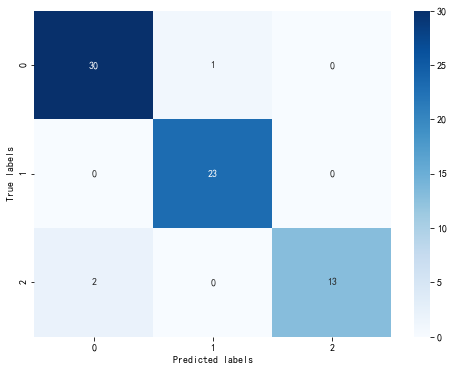

In [49]:
# 查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(test_predict, y_test)
print('The confusion_matrix', confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## 2.4 重要知识点

### 2.4.1 决策树构建的伪代码

输入： 训练集D={($x_1$,$y_1$),($x_2$,$y_2$),....,($x_m$,$y_m$)};    
特征集A={$a_1$,$a_2$,....,$a_d$}
    
输出： 以node为根节点的一颗决策树
    
过程：函数TreeGenerate($D$,$A$)    
1. 生成节点node    
2. $if$ $D$中样本全属于同一类别$C$ $then$:    
3. ----将node标记为$C$类叶节点；$return$    
4. $if$ $A$ = 空集 OR D中样本在$A$上的取值相同 $then$:
5. ----将node标记为叶节点，其类别标记为$D$中样本数最多的类；$return$
6. 从 $A$ 中选择最优划分属性 $a_*$;
7. $for$ $a_*$ 的每一个值 $a_*^v$ $do$:
8. ----为node生成一个分支，令$D_v$表示$D$中在$a_*$上取值为$a_*^v$的样本子集；
9. ----$if$ $D_v$ 为空 $then$:
10. --------将分支节点标记为叶节点，其类别标记为$D$中样本最多的类;$then$
11. ----$else$:
12. --------以 TreeGenerate($D_v$,$A$\{$a_*$})为分支节点


决策树的构建过程是一个递归过程。函数存在三种返回状态：（1）当前节点包含的样本全部属于同一类别，无需继续划分；（2）当前属性集为空或者所有样本在某个属性上的取值相同，无法继续划分；（3）当前节点包含的样本集合为空，无法划分。

### 2.4.2 划分选择

从上述伪代码中我们发现，决策树的关键在于line6.从$A$中选择最优划分属性$𝑎_∗$，一般我们希望决策树每次划分节点中包含的样本尽量属于同一类别，也就是节点的“纯度”更高。

#### 2.4.2.1 信息增益



信息熵是一种衡量数据混乱程度的指标，信息熵越小，则数据的“纯度”越高

$\operatorname{Ent}(D)=-\sum_{k=1}^{|\mathcal{Y}|} p_{k} \log _{2} p_{k}$

其中$p_k$代表了第$k$类样本在$D$中占有的比例。

假设离散属性$a$有$V$个可能的取值{$a^1$,$a^2$,....,$a^V$}，若使用$a$对数据集$D$进行划分，则产生$D$个分支节点，记为$D^v$。则使用$a$对数据集进行划分所带来的信息增益被定义为：

$\operatorname{Gain}(D, a)=\operatorname{Ent}(D)-\sum_{v=1}^{V} \frac{\left|D^{v}\right|}{|D|} \operatorname{Ent}\left(D^{v}\right)$

一般的信息增益越大，则意味着使用特征$a$来进行划分的效果越好。

#### 2.4.2.2 基尼指数

$\begin{aligned}
\operatorname{Gini}(D) &=\sum_{k=1}^{|\mathcal{Y}|} \sum_{k^ {\prime} \neq k} p_{k} p_{k^{\prime}} \\
&=1-\sum_{k=1}^{|\mathcal{Y}|} p_{k}^{2}
\end{aligned}$



基尼指数反映了从数据集$D$中随机抽取两个的类别标记不一致的概率。

$\operatorname{Gini}\operatorname{index}(D, a)=\sum_{v=1}^{V} \frac{\left|D^{v}\right|}{|D|} \operatorname{Gini}\left(D^{v}\right)$

使用特征$a$对数据集$D$划分的基尼指数定义为上。

### 2.4.3 重要参数

#### 2.4.3.1 criterion

Criterion这个参数正是用来决定模型特征选择的计算方法的。sklearn提供了两种选择：

- 输入”entropy“，使用信息熵（Entropy）

- 输入”gini“，使用基尼系数（Gini Impurity）

#### 2.4.3.2 random_state & splitter

random_state用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显。splitter也是用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会优先选择更重要的特征进行分枝（重要性可以通过属性feature_importances_查看），输入“random"，决策树在分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。

#### 2.4.3.3 max_depth

限制树的最大深度，超过设定深度的树枝全部剪掉。这是用得最广泛的剪枝参数，在高维度低样本量时非常有效。决策树多生长一层，对样本量的需求会增加一倍，所以限制树深度能够有效地限制过拟合。

#### 2.4.3.4 min_samples_leaf

min_samples_leaf 限定，一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生。一般搭配max_depth使用，在回归树中有神奇的效果，可以让模型变得更加平滑。这个参数的数量设置得太小会引起过拟合，设置得太大就会阻止模型学习数据。